In [ ]:
import keras as ke
import tensorflow as tf
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
dta_dir = '/content/drive/MyDrive/Data_sets/Emo_analysis'

In [ ]:
exts = ['jpeg', 'jpg', 'png', 'bmp']

for image_class in os.listdir(dta_dir):
  for image in os.listdir(os.path.join(image_class, dta_dir)):
    img_path = os.path.join(image_class, image, dta_dir)
    try:
      img= cv2.imread(img_path)
      tips= imghdr.what(img_path)
      if tips not in exts:
        print('Not in Dir')
        os.remove(img_path)
    except Exception as e:
      print('error')


error
error
error
error


In [ ]:
df = ke.utils.image_dataset_from_directory(dta_dir)
df = df.map(lambda x,y: (x/255, y))


Found 255 files belonging to 2 classes.


In [ ]:
batch = df.as_numpy_iterator().next()

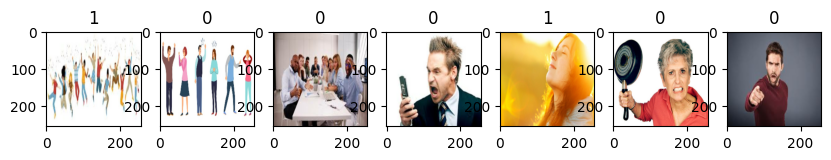

In [ ]:
fig, ax=plt.subplots(ncols=7, figsize=(10,10))
for idx, img in enumerate(batch[0][:7]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
train_size = int(len(df)*.7)
val_size = int(len(df)*.2)
test_size = int(len(df)*.1)

In [ ]:
train = df.take(train_size)
val = df.skip(train_size).take(val_size)
test = df.skip(val_size+train_size).take(test_size)

train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
cnn = ke.models.Sequential([
    ke.layers.Conv2D(input_shape=(256,256,3), filters=64, kernel_size=(3,3), activation='relu', groups=1),
    ke.layers.MaxPool2D(),
    ke.layers.Conv2D(activation='relu', kernel_size=(3,3), filters=32, groups=1),
    ke.layers.MaxPool2D(),
    ke.layers.Conv2D(filters=16, kernel_size=(3,3), activation ='relu', groups=1),
    ke.layers.MaxPool2D(),


    ke.layers.Flatten(),
    ke.layers.Dense(100, activation='relu'),
    ke.layers.Dense(1, activation='sigmoid')


])

In [ ]:
cnn.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

hist =cnn.fit(train, validation_data=val, epochs=3)

Epoch 1/3
5/5 [==============================] - 5s 769ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0775 - val_accuracy: 0.9688
Epoch 2/3
5/5 [==============================] - 4s 731ms/step - loss: 0.1164 - accuracy: 0.9875 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 3/3
5/5 [==============================] - 4s 716ms/step - loss: 0.0235 - accuracy: 0.9875 - val_loss: 0.0028 - val_accuracy: 1.0000


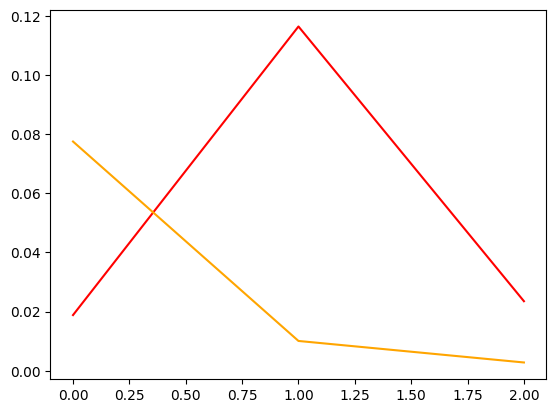

In [ ]:
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation_loss')
plt.show()

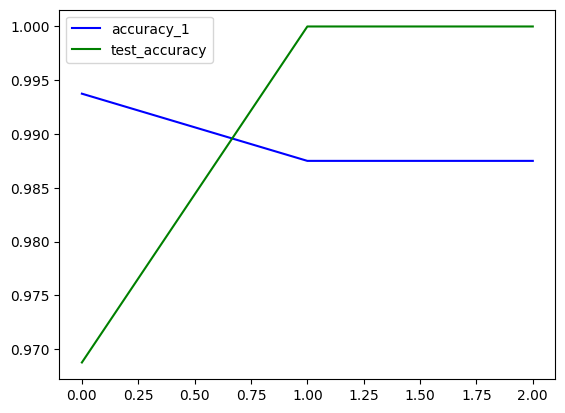

In [ ]:
plt.plot(hist.history['accuracy'], color='blue', label='accuracy_1')
plt.plot(hist.history['val_accuracy'], color='green', label='test_accuracy')
plt.legend()
plt.show()

In [ ]:
pre = ke.metrics.Precision()
re = ke.metrics.Recall()
acc= ke.metrics.Accuracy()

for batch in test.as_numpy_iterator():
  X,y = batch
  y_hat = cnn.predict(X)
  pre.update_state(y_hat, y)
  re.update_state(y_hat, y)
  acc.update_state(y_hat, y)


In [ ]:
print(acc.result(), pre.result(), re.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
test_set = cv2.imread('/content/test-2.jpg')
img = tf.image.resize(test_set, (256,256))

img = np.expand_dims(img/255, 0)

In [ ]:
 cnn.predict(img)

1/1 [==============================] - 0s 31ms/step


array([[1.3299716e-06]], dtype=float32)

In [ ]:
if cnn.predict(img) < 0.5:
  print('It is Angry face')
else:
  print('It is happy face')

1/1 [==============================] - 0s 31ms/step
It is happy face


In [ ]:
cnn.save('Emo_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
